# Задание 5. Извлечение данных 

## Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

*Скрипт лежит в parser_sputnik.py*

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [334]:
data = pd.read_csv('messages.csv', names=['date', 'message']).dropna()
date_info = pd.DataFrame(list(data['date'].str.split()), columns=['date', 'time'])

In [335]:
data

,date,message
0,2023-01-02 06:30:00+00:00,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...
1,2023-01-02 03:00:00+00:00,Народные отчеты о вакцинации\n\n⚠️ ТОЛЬКО ПУБЛ...
2,2023-01-02 00:32:16+00:00,"Ж, 20 лет, умеренный аллергик. Сделала Спутник..."
3,2022-12-31 19:53:12+00:00,"M40, без хронических болезней, в феврале 2022 ..."
4,2022-12-31 14:06:17+00:00,"#ревак #назально #спутник\n\nЖ53, ковидом не б..."
...,...,...
25140,2020-12-09 17:07:46+00:00,"Есть примеры, уже появлялись"
25141,2020-12-09 17:07:12+00:00,Если денег не жалко
25142,2020-12-09 17:06:53+00:00,Не рано?
25143,2020-12-09 17:06:36+00:00,Через 2 недели обычно сдают


In [336]:
date_info

,date,time
0,2023-01-02,06:30:00+00:00
1,2023-01-02,03:00:00+00:00
2,2023-01-02,00:32:16+00:00
3,2022-12-31,19:53:12+00:00
4,2022-12-31,14:06:17+00:00
...,...,...
23375,2020-12-09,17:07:46+00:00
23376,2020-12-09,17:07:12+00:00
23377,2020-12-09,17:06:53+00:00
23378,2020-12-09,17:06:36+00:00


График зависимости числа сообщений от даты

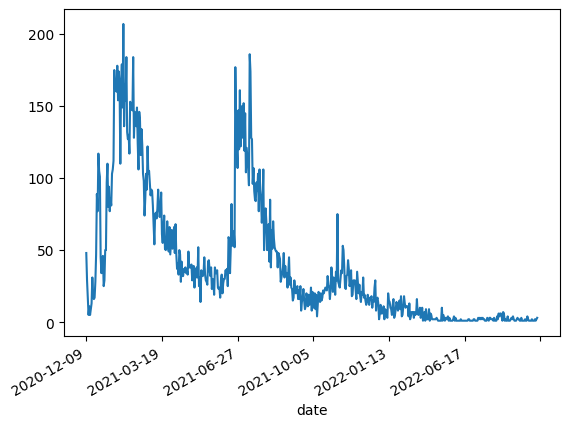

In [337]:
date_info.groupby('date').size().plot()
plt.gcf().autofmt_xdate()

## Задание 5.2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

In [338]:
def sender_info(data):
    # оставляем сообщения, где указан пол и возраст (смотрим наличие цифр, 
    # далее будем смотреть непосредственно возраст)
    data = data[data['message'].str.contains('Ж|М|м|ж')]
    data = data[data['message'].str.contains('[0-9]')]
    
    data['personal_info'] = data['message'].str.extract('([МЖмж].[0-9].)')
    data['personal_info'] = data['personal_info'].str.upper()
    
    data['gender'] = data['personal_info'].str.extract('([МЖмж])')
    data['age'] = data['personal_info'].str.extract('([0-9][0-9])')
    data = data.drop('personal_info', axis=1)
    data = data.dropna()
    return data

In [339]:
data = sender_info(data)

In [340]:
data

,date,message,gender,age
4,2022-12-31 14:06:17+00:00,"#ревак #назально #спутник\n\nЖ53, ковидом не б...",Ж,53
9,2022-12-25 11:24:02+00:00,#назально #ревак #спутник-V\nМ33. 1 комп.: лег...,М,33
11,2022-12-19 14:35:43+00:00,#назально #ревак. Ж35. Хр. Заболевания: полива...,Ж,35
14,2022-12-12 23:10:46+00:00,#дети\nМ 13 лет. спутник м. \n1я доза 23.10.2...,М,13
15,2022-12-09 07:23:43+00:00,#ревак #назально #спутник \nМ 49 вторая доза...,М,49
...,...,...,...,...
25087,2020-12-10 11:17:32+00:00,Ж.47 Сутки после вакцинации (9.12.20). К ве...,Ж,47
25095,2020-12-10 05:00:09+00:00,М 48. Без симтомов. Тест на 30 день. вакцина 1...,М,48
25098,2020-12-09 20:05:05+00:00,М37. Первый компонент 03.12.2020 в 17:00. Чере...,М,37
25103,2020-12-09 19:11:56+00:00,Расскажу первые ощущение на свежую голову про ...,М,38


Число прививок в зависимости от возраста

<AxesSubplot: xlabel='age'>

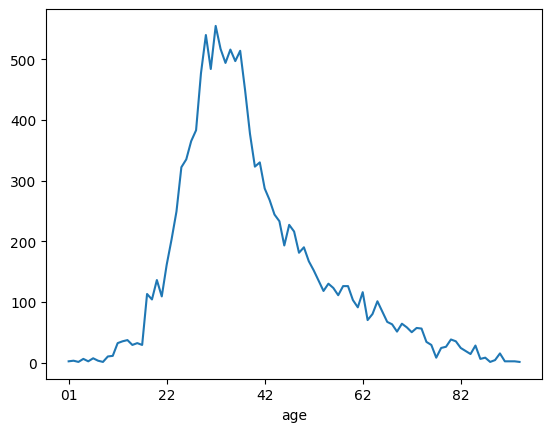

In [341]:
data.groupby(['age']).size().plot()

Число прививок в зависимости от пола

<AxesSubplot: >

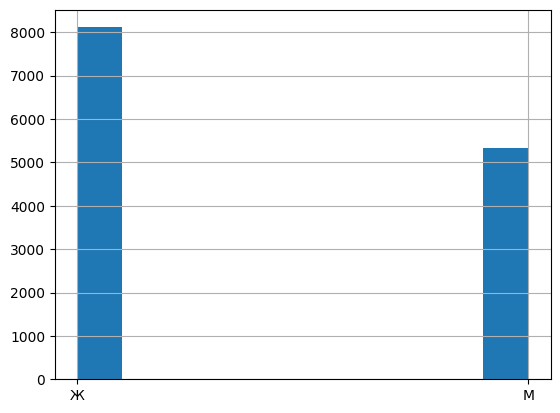

In [342]:
data['gender'].hist()

Число прививок в зависимости от возраста и пола

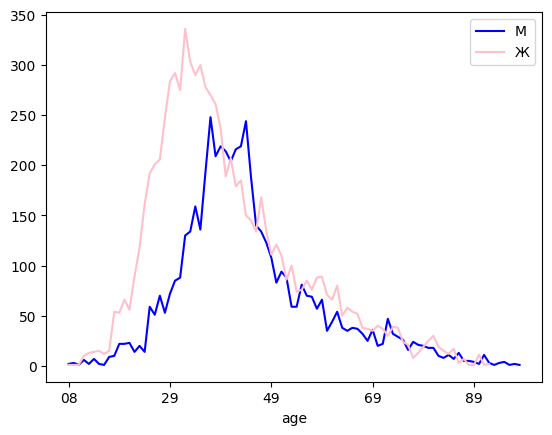

In [343]:
data_for_plot = data.groupby(['gender','age']).size()
data_for_plot['М'].plot(color='blue')
data_for_plot['Ж'].plot(color='pink')
plt.legend(['М', 'Ж'])
plt.show()

Зависимость числа болеющих гипертонией от возраста

<AxesSubplot: xlabel='age'>

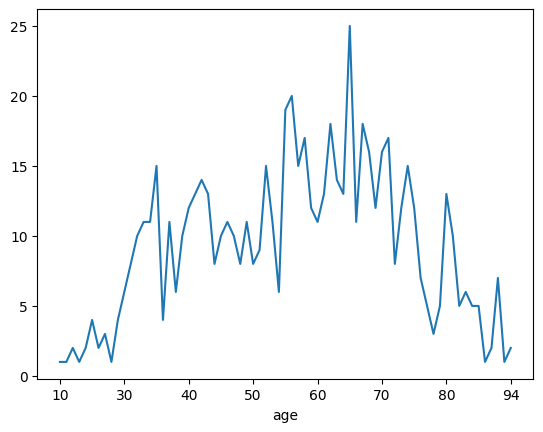

In [344]:
data_hyst = data[data['message'].str.contains('гипертония')]
data_hyst.groupby('age').size().plot()

Как видим из предыдущего графика, наибольшее число людей, болеющих гипертонией, находятся приблизительно в пределах от 50 до 70 лет. Посмотрим соотношение числа людей с гипертонией ко всем людям, написавшим сообщение в канал.

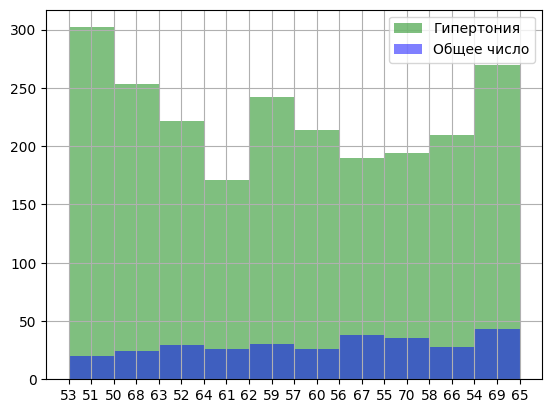

In [345]:
data_hyst = data_hyst[data_hyst['age'].astype(int).between(50, 70)]
data_50_70 = data[data['age'].astype(int).between(50, 70)]

data_50_70['age'].hist(color='green', alpha=0.5)
data_hyst['age'].hist(color='blue', alpha=0.5)
plt.legend(['Гипертония', 'Общее число'])

Зависимость числа антител от возраста

In [351]:
data = data[data['message'].str.contains('bau|BAU')]
data['BAU'] = data['message'].str.extract('(...[0-9.,][0-9][0-9].bau)', flags=re.IGNORECASE, expand=False).str.upper()
data['BAU'] = data['BAU'].str.replace(' BAU', '')
data['BAU'] = data['BAU'].str.replace(',', '.')
data['BAU'] = data['BAU'].str.replace('.[0-9][.]', '')
data['BAU'] = data['BAU'].str.replace('(\D)', '')
data['BAU'] = pd.to_numeric(data['BAU'], errors='ignore')

data = data.dropna()

C:\Users\ermol\AppData\Local\Temp\ipykernel_4916\118204072.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['BAU'] = data['BAU'].str.replace('.[0-9][.]', '')
C:\Users\ermol\AppData\Local\Temp\ipykernel_4916\118204072.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['BAU'] = data['BAU'].str.replace('(\D)', '')


<AxesSubplot: >

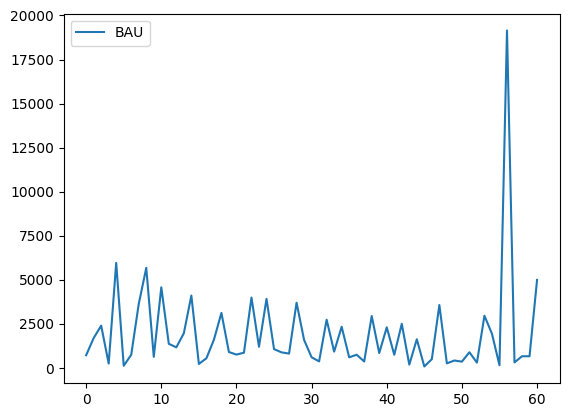

In [352]:
data.groupby(['age'])['BAU'].mean().reset_index().plot()